In [2]:
import numpy as np
import tensorflow as tf


In [3]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [5]:
credentails = json.load(open("kaggle.json"))

In [6]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = credentails["username"]
os.environ['KAGGLE_KEY'] = credentails["key"]

In [7]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.03G/2.04G [00:13<00:00, 232MB/s]
100% 2.04G/2.04G [00:13<00:00, 161MB/s]


In [8]:
!ls

drive  kaggle.json  plantvillage-dataset.zip  sample_data


In [9]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [10]:
print(os.listdir("plantvillage dataset"))
print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['grayscale', 'segmented', 'color']
38
['Strawberry___healthy', 'Grape___Esca_(Black_Measles)', 'Tomato___Tomato_mosaic_virus', 'Pepper,_bell___healthy', 'Grape___healthy']
38
['Strawberry___healthy', 'Grape___Esca_(Black_Measles)', 'Tomato___Tomato_mosaic_virus', 'Pepper,_bell___healthy', 'Grape___healthy']
38
['Strawberry___healthy', 'Grape___Esca_(Black_Measles)', 'Tomato___Tomato_mosaic_virus', 'Pepper,_bell___healthy', 'Grape___healthy']


In [11]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['dd8269de-653e-42c1-a787-cb9f537e6d10___Mt.N.V_HL 6112.JPG', '3de46830-0f75-4e2b-bb64-e09b13f4f578___Mt.N.V_HL 6145.JPG', '18830d61-997d-438c-bd24-4dd427a45c4d___Mt.N.V_HL 6123.JPG', '2d1327cf-7a91-4baf-b3b6-42517c795c9c___Mt.N.V_HL 6171.JPG', 'b80580f7-8e3e-4a81-ae32-df854d6ae3a8___Mt.N.V_HL 8978.JPG']


In [12]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


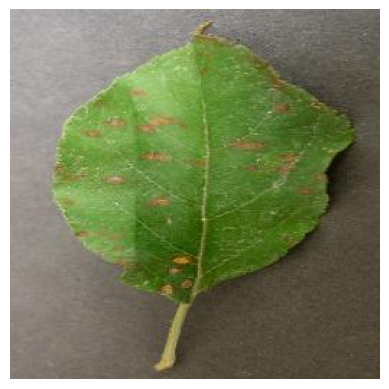

In [13]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [14]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [15]:
# Image Parameters
img_size = 224
batch_size = 32

In [16]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [17]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [27]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical',
    shuffle = False
)

Found 10849 images belonging to 38 classes.


In [19]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 103s 71ms/step - accuracy: 0.5764 - loss: 1.9701 - val_accuracy: 0.8245 - val_loss: 0.5487
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 133s 68ms/step - accuracy: 0.8944 - loss: 0.3342 - val_accuracy: 0.8671 - val_loss: 0.4201
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 90s 66ms/step - accuracy: 0.9473 - loss: 0.1579 - val_accuracy: 0.8795 - val_loss: 0.4339
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 90s 66ms/step - accuracy: 0.9722 - loss: 0.0848 - val_accuracy: 0.8600 - val_loss: 0.5755
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 89s 65ms/step - accuracy: 0.9782 - loss: 0.0676 - val_accuracy: 0.8605 - val_loss: 0.5888


In [28]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
  1/339 ━━━━━━━━━━━━━━━━━━━━ 28s 84ms/step - accuracy: 0.4688 - loss: 1.8944

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.8440 - loss: 0.6402
Validation Accuracy: 86.05%


340/340 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step


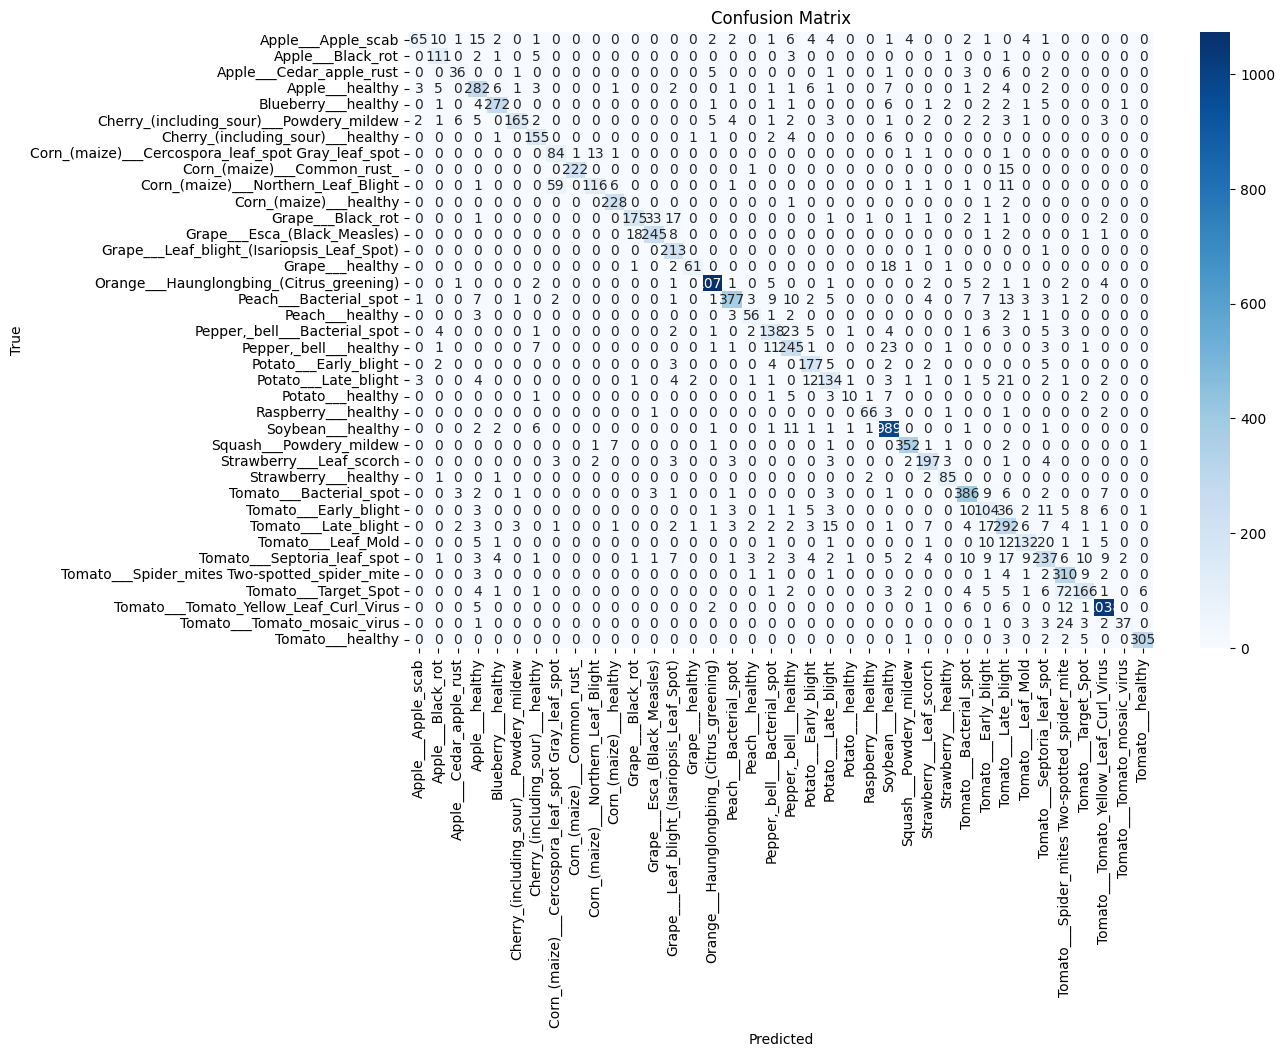

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.88      0.52      0.65       126
                                 Apple___Black_rot       0.81      0.90      0.85       124
                          Apple___Cedar_apple_rust       0.73      0.65      0.69        55
                                   Apple___healthy       0.79      0.86      0.82       329
                               Blueberry___healthy       0.93      0.91      0.92       300
          Cherry_(including_sour)___Powdery_mildew       0.96      0.79      0.86       210
                 Cherry_(including_sour)___healthy       0.84      0.91      0.87       170
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.56      0.82      0.67       102
                       Corn_(maize)___Common_rust_       1.00      0.93      0.96       238
               Corn_(maize)___Northern_Leaf_Blight       0.88      0.59      0.

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get true labels and predicted labels for the validation set
y_true = validation_generator.classes
y_pred = model.predict(validation_generator, steps=None)  # This ensures full coverage
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
class_labels = list(validation_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


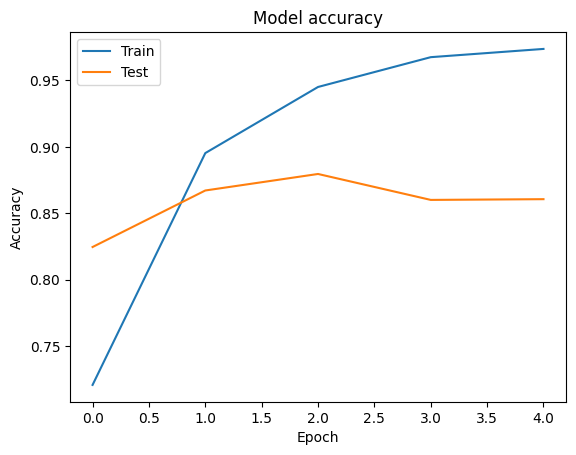

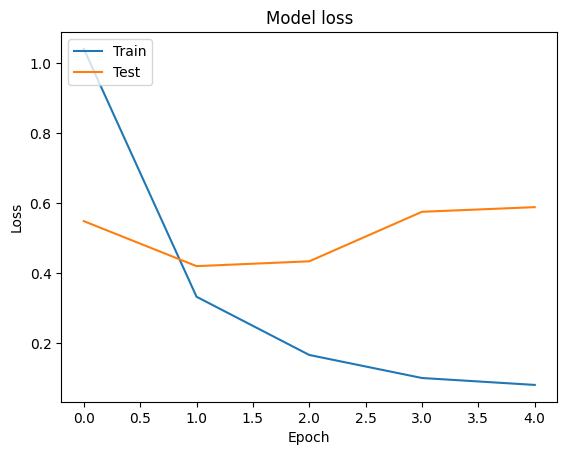

In [30]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [31]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [32]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [33]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [34]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [36]:
# Example Usage
image_path = '/content/peach_bacterial_spot.JPG'
#image_path = '/content/plantvillage dataset/Potato_ healthy.JPG'
#image_path = '/content/plantvillage dataset/apple_black_rot.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
Predicted Class Name: Peach___Bacterial_spot


In [ ]:
model.save('drive/MyDrive/Models/plant_disease_prediction_model.h5')